# Dfsu - Distance to land
Calculate the distance to land for each element in mesh and save to dfsu file

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mikeio

In [2]:
msh = mikeio.Mesh("../tests/testdata/odense_rough.mesh")
msh

Flexible Mesh
Number of elements: 654
Number of nodes: 399
Projection: UTM-33

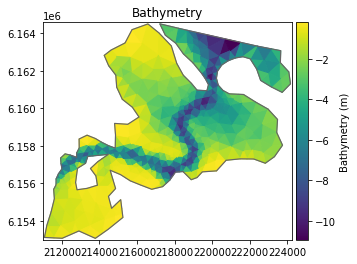

In [3]:
msh.plot();

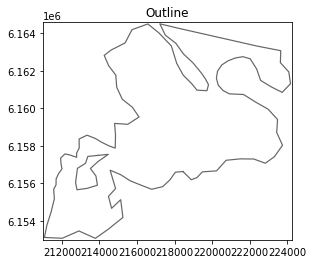

In [4]:
msh.geometry.plot.outline();

# Get a list of land nodes

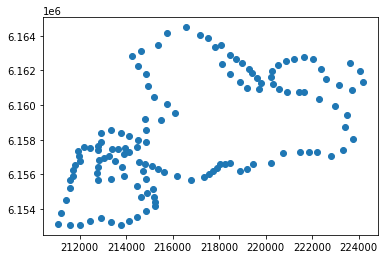

In [5]:
ncland = msh.node_coordinates[msh.codes==1]

plt.scatter(ncland[:,0], ncland[:,1]);

# Get element coordinates

In [6]:
ec = msh.element_coordinates

# Calculate distance to nearest land node

In [7]:
i = 0
ne = ec.shape[0]
d = np.zeros(ne)

for i in range(ne):
    d[i] = np.min(np.sqrt((ec[i,0] - ncland[:,0])**2 + (ec[i,1] -ncland[:,1])**2))

In [8]:
da = mikeio.DataArray(data=d,
                      geometry=msh.geometry,
                      item=mikeio.ItemInfo("Distance to land", mikeio.EUMType.Distance, mikeio.EUMUnit.meter))
da

<mikeio.DataArray>
Name: Distance to land
Geometry: Dfsu2D
Dimensions: (element:654)
Time: 2018-01-01 00:00:00 (time-invariant)

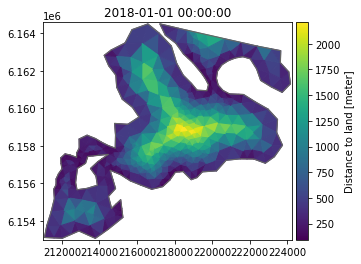

In [9]:
da.plot();

# Store result in a new Dfsu file

In [10]:
da.to_dfs("distance.dfsu")

# Clean up

In [11]:
import os
os.remove("distance.dfsu")